# Examples: Building a Penguin Species Classification Model with scikit-learn

--- 
### Objective
* The goal of this exercise is to build a classification model using the scikit-learn library to predict the species of penguins based on features from the dataset.

## Dataset
* You will be using the famous "Penguins" dataset, which contains various measurements of penguins, such as bill length, bill depth, flipper length, and body mass, along with the target variable 'species' which represents the penguin species.
* Please begin by importing the necessary libraries and loading the penguins dataset ( https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv ) into a Pandas DataFrame. 

## Instructions


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

penguins_data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Check for missing values
missing_values = penguins_data.isnull().sum()
print(f"Before cleaning, missing values:\n{missing_values}")

# Fill missing values in numerical columns with the median
# The select_dtypes(include=['number']) statement selects all the columns that are of numeric data type. 
# The string 'number' is a placeholder for all numeric data types in Pandas

for column in penguins_data.select_dtypes(include=['number']):
    if missing_values[column] > 0:
        penguins_data[column] = penguins_data[column].fillna(penguins_data[column].median())

# Fill missing values in categorical columns with a string such as "unknown"
# The select_dtypes(include=['object']) statement selects all the columns that are of object data type.
# In Pandas, an object data type can hold any type of data, including strings, and other non-numeric data.

for column in penguins_data.select_dtypes(include=['object']):
    if missing_values[column] > 0:
        penguins_data[column] = penguins_data[column].fillna('unknown')
    
    # To ensure consistency and avoid case sensitivity issues, 
    # convert the strings in the string columns to lowercase
    
    penguins_data[column] = penguins_data[column].str.lower()

# After handling missing values, check for missing values again
missing_values = penguins_data.isnull().sum()

print(f"\nAfter cleaning, missing Values:\n{missing_values}")

Before cleaning, missing values:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

After cleaning, missing Values:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [38]:
# Check for the number of duplicated rows
duplicates = penguins_data.duplicated().sum()

# If duplicates found, drop them, keep first occurence
if duplicates > 0:
    penguins_data = penguins_data.drop_duplicates()

print(f"\nDuplicates:{duplicates}")
print("\n")

# Delete rows with 'unknown' in the 'sex' column
penguins_data = penguins_data[penguins_data['sex'].str.lower() != 'unknown']

penguins_data.info()
penguins_data.head(15)


Duplicates:0


<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,adelie,torgersen,39.1,18.7,181.0,3750.0,male
1,adelie,torgersen,39.5,17.4,186.0,3800.0,female
2,adelie,torgersen,40.3,18.0,195.0,3250.0,female
4,adelie,torgersen,36.7,19.3,193.0,3450.0,female
5,adelie,torgersen,39.3,20.6,190.0,3650.0,male
6,adelie,torgersen,38.9,17.8,181.0,3625.0,female
7,adelie,torgersen,39.2,19.6,195.0,4675.0,male
12,adelie,torgersen,41.1,17.6,182.0,3200.0,female
13,adelie,torgersen,38.6,21.2,191.0,3800.0,male
14,adelie,torgersen,34.6,21.1,198.0,4400.0,male


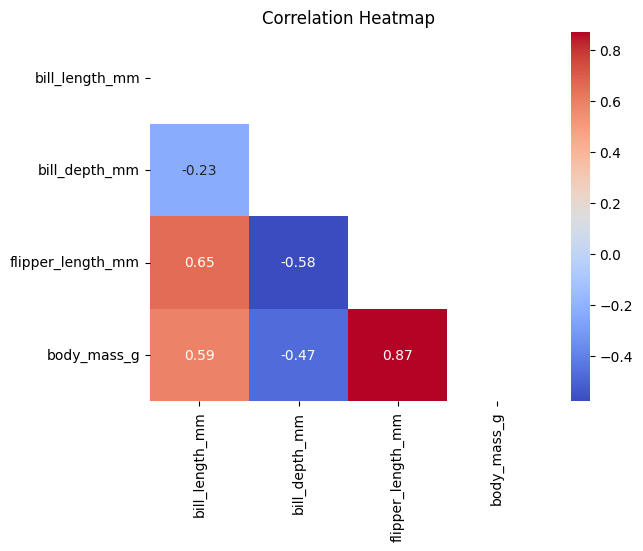

In [39]:
# Calculate and visualize correlations between the features or columns
correlation_matrix = penguins_data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix))

# Plot the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [40]:
# Calculate the variance of 'body_mass' and 'flipper_length_mm'
variance_body_mass = penguins_data['body_mass_g'].var()
variance_flipper_length = penguins_data['flipper_length_mm'].var()

# Print the variance values
print("Variance of 'body_mass_g':", variance_body_mass)
print("Variance of 'flipper_length_mm':", variance_flipper_length)

# Drop the column with lower variance
if variance_body_mass < variance_flipper_length:
    penguins_data.drop('body_mass_g', axis=1, inplace=True)
    column_dropped = 'body_mass_g'
else:
    penguins_data.drop('flipper_length_mm', axis=1, inplace=True)
    column_dropped = 'flipper_length_mm'

print(f"Dropped column: {column_dropped}\n\n")
penguins_data.info()


Variance of 'body_mass_g': 648372.487698542
Variance of 'flipper_length_mm': 196.44167661637542
Dropped column: flipper_length_mm


<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         333 non-null    object 
 1   island          333 non-null    object 
 2   bill_length_mm  333 non-null    float64
 3   bill_depth_mm   333 non-null    float64
 4   body_mass_g     333 non-null    float64
 5   sex             333 non-null    object 
dtypes: float64(3), object(3)
memory usage: 18.2+ KB


In [41]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode 'sex' and 'species' columns
penguins_data['sex'] = label_encoder.fit_transform(penguins_data['sex'])
penguins_data['species'] = label_encoder.fit_transform(penguins_data['species'])
penguins_data['island'] = label_encoder.fit_transform(penguins_data['island'])

# Create a mapping dictionary for 'species' labels
species_mapping = {label: species for label, species in enumerate(label_encoder.classes_)}
print(f"label_encoder.classes_: {label_encoder.classes_}\n\n")
print(f"label_encoder.classes_[0]: {label_encoder.classes_[0]}\n\n")
print(f"species_mapping: {species_mapping}\n\n")

original_species = label_encoder.inverse_transform([0, 1, 2])
print(f"original_species: {original_species}")

penguins_data.head()

label_encoder.classes_: ['biscoe' 'dream' 'torgersen']


label_encoder.classes_[0]: biscoe


species_mapping: {0: 'biscoe', 1: 'dream', 2: 'torgersen'}


original_species: ['biscoe' 'dream' 'torgersen']


,species,island,bill_length_mm,bill_depth_mm,body_mass_g,sex
0,0,2,39.1,18.7,3750.0,1
1,0,2,39.5,17.4,3800.0,0
2,0,2,40.3,18.0,3250.0,0
4,0,2,36.7,19.3,3450.0,0
5,0,2,39.3,20.6,3650.0,1


In [42]:
from sklearn.model_selection import train_test_split

# Data Splitting
X = penguins_data.drop('species', axis=1)  # Features
y = penguins_data['species']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Building a Decision Tree Classifier model 
### (without cross-validation, without hyperparamter tuning)

In the following codes, we demonstrate how to build a classification model using the Decision Tree algorithm. However, please note that there is no cross-validation and no hyperparameter tuning. We will cover those in the subsequent example. 

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the classifier
classifier = DecisionTreeClassifier(random_state=42)

# Step 2: Train the classifier on the training data
classifier.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = classifier.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print(f"species_mapping: {species_mapping}\n")
print("Classification Report:\n", class_report)


Accuracy: 1.0
Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
species_mapping: {0: 'biscoe', 1: 'dream', 2: 'torgersen'}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



# Hyperparameter tuning

Hyperparameter tuning in scikit-learn is the process of finding the best values for the hyperparameters of a machine learning model. Hyperparameters are parameters that are not learned from the data, but instead must be set manually. 
* Some common examples of hyperparameters include the number of trees in a random forest, the alpha value of the elastic net algorithm, and the regularization parameter of a support vector machine.

Hyperparameter tuning is important because it can have a significant impact on the performance of a machine learning model. If the hyperparameters are not set correctly, the model may underfit or overfit the training data. 
* Underfitting occurs when the model is not able to learn the training data well enough, while overfitting occurs when the model learns the training data too well and is unable to generalize to new data.

There are a number of different ways to tune hyperparameters in scikit-learn. One common approach is to use grid search. Grid search works by trying all possible combinations of hyperparameter values. This can be time-consuming, but it can be a good way to find the best hyperparameter values if there are only a few hyperparameters to tune.

Another common approach to hyperparameter tuning is to use random search. Random search works by randomly sampling hyperparameter values. This can be more efficient than grid search, but it can be less accurate.






## GridSearchCV & RandomizedSearchCV
To conduct the hyperparameter tuning of a Decision Tree classifier model, you can use the `GridSearchCV` or `RandomizedSearchCV` classes. 
* These classes allow you to specify a grid of hyperparameter values, and then they will train the pipeline on each combination of hyperparameter values. 
* Once the training is complete, the classes will select the best combination of hyperparameter values based on the validation performance of the pipeline.

The `best_model` variable will now contain the pipeline with the best hyperparameters that were found by the grid search.

You can also use RandomizedSearchCV to tune the hyperparameters of a random forest model. RandomizedSearchCV works in a similar way to GridSearchCV, but instead of trying all possible combinations of hyperparameter values, it randomly samples from the hyperparameter grid. This can be more efficient than GridSearchCV when there are a large number of hyperparameters to tune.

### Grid search versus GridSearchCV 

GridSearch and GridSearchCV both perform hyperparameter tuning using grid search, but they differ in how they handle cross-validation:

* #### GridSearch
  * GridSearch is a basic grid search approach where you specify a grid of hyperparameters and their possible values.
  * It exhaustively evaluates all possible combinations of hyperparameters without any cross-validation. In other words, it trains and evaluates the model on the entire dataset for each combination.
  * This can lead to overfitting, as the model's performance is assessed on the same data used for training.
  * It doesn't provide any built-in cross-validation support, so you need to implement cross-validation separately if desired.

In contrast, GridSearchCV is a more robust and recommended approach.
* #### GridSearchCV (Cross-Validated Grid Search)
  * GridSearchCV extends GridSearch by incorporating cross-validation.
  * It performs k-fold cross-validation (where k is specified by you) for each combination of hyperparameters in the grid.
  * For each combination, it divides the dataset into k subsets (folds), trains the model on k-1 folds, and validates it on the remaining fold. This process is repeated k times, with each fold being used as the validation set once.
  * The final performance metric is typically an average (e.g., mean or weighted mean) of the results from all folds, which provides a more reliable estimate of the model's performance.
  * GridSearchCV helps prevent overfitting and gives you a better understanding of how the model generalizes to unseen data.

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the penguins dataset
penguins_data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Check for missing values
missing_values = penguins_data.isnull().sum()
print(f"Before cleaning, missing values:\n{missing_values}\n")

# Fill missing values in numerical columns with the median
for column in penguins_data.select_dtypes(include=['number']):
    if missing_values[column] > 0:
        penguins_data[column].fillna(penguins_data[column].median(), inplace=True)

# Fill missing values in categorical columns with "unknown"
for column in penguins_data.select_dtypes(include=['object']):
    if missing_values[column] > 0:
        penguins_data[column].fillna('unknown', inplace=True)
    penguins_data[column] = penguins_data[column].str.lower()

# Check for the number of duplicated rows
duplicates = penguins_data.duplicated().sum()
if duplicates > 0:
    penguins_data.drop_duplicates(inplace=True)

# Delete rows with 'unknown' in the 'sex' column
penguins_data = penguins_data[penguins_data['sex'].str.lower() != 'unknown']

# Calculate the variance of 'body_mass_g' and 'flipper_length_mm'
variance_body_mass = penguins_data['body_mass_g'].var()
variance_flipper_length = penguins_data['flipper_length_mm'].var()

# Drop the column with lower variance
if variance_body_mass < variance_flipper_length:
    penguins_data.drop('body_mass_g', axis=1, inplace=True)
else:
    penguins_data.drop('flipper_length_mm', axis=1, inplace=True)

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode 'sex', 'species', and 'island' columns
penguins_data['sex'] = label_encoder.fit_transform(penguins_data['sex'])
penguins_data['species'] = label_encoder.fit_transform(penguins_data['species'])
penguins_data['island'] = label_encoder.fit_transform(penguins_data['island'])

# Data Splitting
X = penguins_data.drop('species', axis=1)
y = penguins_data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameter grid for DecisionTreeClassifier
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
cv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the model to the training data
cv.fit(X_train, y_train)

# Get the best model
best_model = cv.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Best Model Parameters: {cv.best_params_}\n")
print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix:\n {conf_matrix}\n")
print(f"Classification Report:\n {class_report}")



Before cleaning, missing values:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64



C:\Users\Sachin\AppData\Local\Temp\ipykernel_8288\2737993320.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins_data[column].fillna(penguins_data[column].median(), inplace=True)
C:\Users\Sachin\AppData\Local\Temp\ipykernel_8288\2737993320.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Best Model Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}

Accuracy: 1.0

Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In the classification report, there are several metrics that can be useful for evaluating the performance of a machine learning model. Here are explanations for three commonly used metrics:

#### Accuracy:

* Accuracy is a measure of how many of the predicted labels match the true labels in the test dataset. It's essentially the ratio of correct predictions to the total number of predictions.
Formula: (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
* It provides an overall view of the model's correctness in predicting all classes.
* However, accuracy can be misleading in imbalanced datasets, where one class has significantly more examples than the others. In such cases, a model can achieve high accuracy by simply predicting the majority class.

#### Macro Avg (Macro-Averaging):

* Macro Avg calculates the average of the evaluation metric (e.g., precision, recall, F1-score) for each class without considering class imbalance. It gives equal weight to each class.
* It's useful when you want to assess the model's performance on each class independently and then take the average.
* For example, if you have a multi-class classification problem, you calculate the precision, recall, and F1-score for each class and then average them without considering class sizes.

#### Weighted Avg (Weighted-Averaging):

* Weighted Avg is similar to Macro Avg but takes into account class imbalance. It calculates the weighted average of the evaluation metric for each class, where the weights are proportional to the number of true instances of each class.
* This is particularly useful when you have imbalanced classes because it gives more weight to the evaluation metrics of the larger classes, ensuring they have a more significant impact on the average.
* Weighted Avg is especially useful when you want to assess the model's performance in a way that reflects its effectiveness on each class while accounting for class sizes.

## Pipelines in scikit-learn
A pipeline in scikit-learn is a chain of transformers and estimators. It allows you to sequentially apply multiple data transformations and machine learning algorithms to your data. Pipelines are a powerful tool for machine learning because they can help you to:
* Simplify and streamline your machine learning workflow.
* Make your code more reusable and maintainable.
* Improve the performance of your machine learning models by applying the right transformations to your data.

To create a pipeline in scikit-learn, you use the `Pipeline` class. The Pipeline class takes a list of transformers and estimators as input, and it applies them to your data in the order that they are listed.

* To train the pipeline on your data, you simply call the `fit()` method
* Once the pipeline is trained, you can make predictions on new data using the `predict()` method


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Splitting
X = penguins_data.drop('species', axis=1)
y = penguins_data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline for Logistic Regression
pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=15000,random_state=42))
])

# Define hyperparameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10]
}

# Create a GridSearchCV object
cv = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the model to the training data
cv.fit(X_train, y_train)

# Get the best model
best_model = cv.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Best Model Parameters: {cv.best_params_}\n")
print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix:\n {conf_matrix}\n")
print(f"Classification Report:\n {class_report}")


Best Model Parameters: {'classifier__C': 10}

Accuracy: 1.0

Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

